In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
train_df=pd.read_csv("/home/randolphwanjiru/DSP4382-B/train-new.csv")
test_df=pd.read_csv("/home/randolphwanjiru/DSP4382-B/test-new.csv")

In [6]:
train_df.head(5)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


In [7]:
train_df.shape

(17565, 15)

In [8]:
train_df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


In [9]:
train_df.columns

Index(['dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'caseid', 'injSeverity'],
      dtype='object')

In [10]:
train_df.isnull().sum()

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
caseid         0
injSeverity    0
dtype: int64

In [11]:
# Display basic statistics
train_summary = train_df.describe()
train_summary

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


## Feautre Engineering

In [12]:
# Drop 'caseid' since it's just an identifier
train_df.drop(columns=['caseid'], inplace=True)
test_df.drop(columns=['caseid'], inplace=True)

In [13]:
# impute missing value in test set
test_df.loc[:, 'yearVeh'] = test_df['yearVeh'].fillna(test_df['yearVeh'].median())

In [14]:
train_df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,10-24,131.491,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,0
17561,10-24,281.693,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,1
17562,10-24,419.418,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,3
17563,40-54,9.815,alive,none,none,1,f,22,2000,1990,unavail,driver,0,3


In [15]:
# remove non numerical from dvcat variable 
# replace range with the midpoint 
import re
def clean_and_convert(value):
    # Extract all numbers
    numbers = re.findall(r'\d+', str(value))  
    
    # If it's a range (e.g., "1-9 km/h"), compute the midpoint
    if len(numbers) == 2:
        return (int(numbers[0]) + int(numbers[1])) // 2
    
    # If it's a single number, return it as an integer
    elif len(numbers) == 1:
        return int(numbers[0])
    
    # If there's no number, return NaN or a default value
    return np.nan  

# Apply the function to the column
train_df["dvcat"] = train_df["dvcat"].apply(clean_and_convert)
test_df["dvcat"] = train_df["dvcat"].apply(clean_and_convert)

In [16]:
# convert weight category from float to integrers (rounded)
train_df["weight"] = train_df["weight"].round().astype(int)
test_df["weight"] = train_df["weight"].round().astype(int)
#test_df
train_df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55,53,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,3
1,32,155,alive,none,none,1,m,26,2001,1968,unavail,driver,0,3
2,55,39,alive,none,none,1,f,51,2002,1994,unavail,driver,0,3
3,32,169,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,3
4,17,28,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,17,131,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,0
17561,17,282,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,1
17562,17,419,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,3
17563,47,10,alive,none,none,1,f,22,2000,1990,unavail,driver,0,3


In [17]:
# Rename the columns
train_df.rename(columns={
    "dvcat": "vehicle_type",
    "weight": "vehicle_weight",
    "dead": "fatality",
    "airbag": "airbag_present",
    "seatbelt": "seatbelt_used",
    "frontal": "frontal_crash",
    "sex": "occupant_sex",
    "ageOFocc": "occupant_age",
    "yearacc": "accident_year",
    "yearVeh": "vehicle_year",
    "abcat": "airbag_status",
    "occRole": "occupant_role",
    "deploy": "airbag_deployed",
    "caseid": "case_id",
    "injSeverity": "injury_severity"
}, inplace=True)

test_df.rename(columns={
    "dvcat": "vehicle_type",
    "weight": "vehicle_weight",
    "dead": "fatality",
    "airbag": "airbag_present",
    "seatbelt": "seatbelt_used",
    "frontal": "frontal_crash",
    "sex": "occupant_sex",
    "ageOFocc": "occupant_age",
    "yearacc": "accident_year",
    "yearVeh": "vehicle_year",
    "abcat": "airbag_status",
    "occRole": "occupant_role",
    "deploy": "airbag_deployed",
    "caseid": "case_id",
    "injSeverity": "injury_severity"
}, inplace=True)

In [18]:
#test_df.columns
train_df.columns

Index(['vehicle_type', 'vehicle_weight', 'fatality', 'airbag_present',
       'seatbelt_used', 'frontal_crash', 'occupant_sex', 'occupant_age',
       'accident_year', 'vehicle_year', 'airbag_status', 'occupant_role',
       'airbag_deployed', 'injury_severity'],
      dtype='object')

In [19]:
train_df

,vehicle_type,vehicle_weight,fatality,airbag_present,seatbelt_used,frontal_crash,occupant_sex,occupant_age,accident_year,vehicle_year,airbag_status,occupant_role,airbag_deployed,injury_severity
0,55,53,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,3
1,32,155,alive,none,none,1,m,26,2001,1968,unavail,driver,0,3
2,55,39,alive,none,none,1,f,51,2002,1994,unavail,driver,0,3
3,32,169,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,3
4,17,28,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,17,131,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,0
17561,17,282,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,1
17562,17,419,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,3
17563,47,10,alive,none,none,1,f,22,2000,1990,unavail,driver,0,3


In [20]:
print(train_df["injury_severity"].nunique())  # Count unique values
#print(df["injury_severity"].dtype)  # Check data type

7


In [21]:
print(train_df["injury_severity"].dtype)  # Check data type

int64


/tmp/ipykernel_18947/967955717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["injury_severity"], palette="viridis")


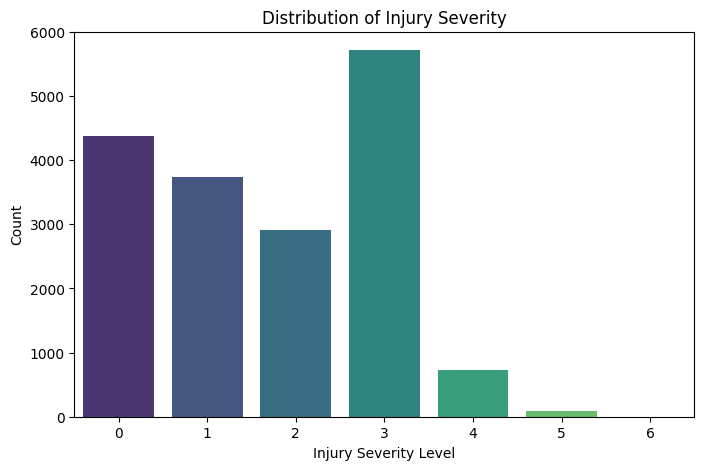

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["injury_severity"], palette="viridis")
plt.title("Distribution of Injury Severity")
plt.xlabel("Injury Severity Level")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_18947/4263347774.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=train_df["accident_year"], y=train_df["injury_severity"], ci=None)


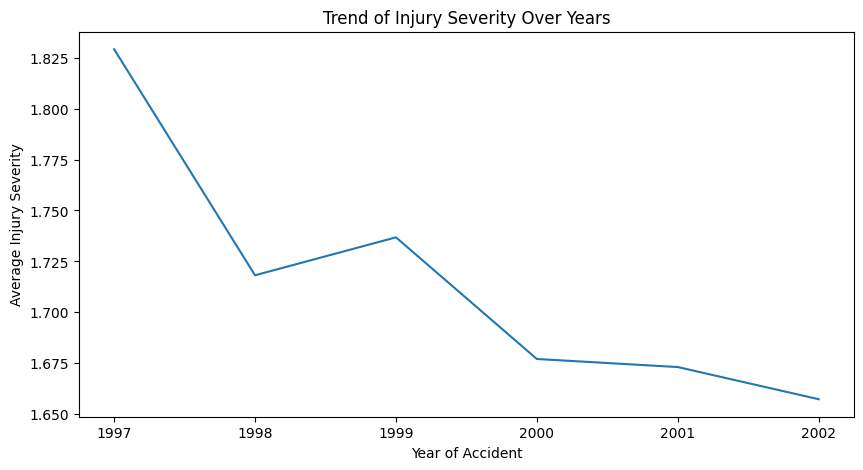

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=train_df["accident_year"], y=train_df["injury_severity"], ci=None)
plt.title("Trend of Injury Severity Over Years")
plt.xlabel("Year of Accident")
plt.ylabel("Average Injury Severity")
plt.show()

/tmp/ipykernel_18947/3535956000.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_severity_counts = train_df.groupby(["age_group", "injury_severity"]).size().unstack()


<Figure size 1200x600 with 0 Axes>

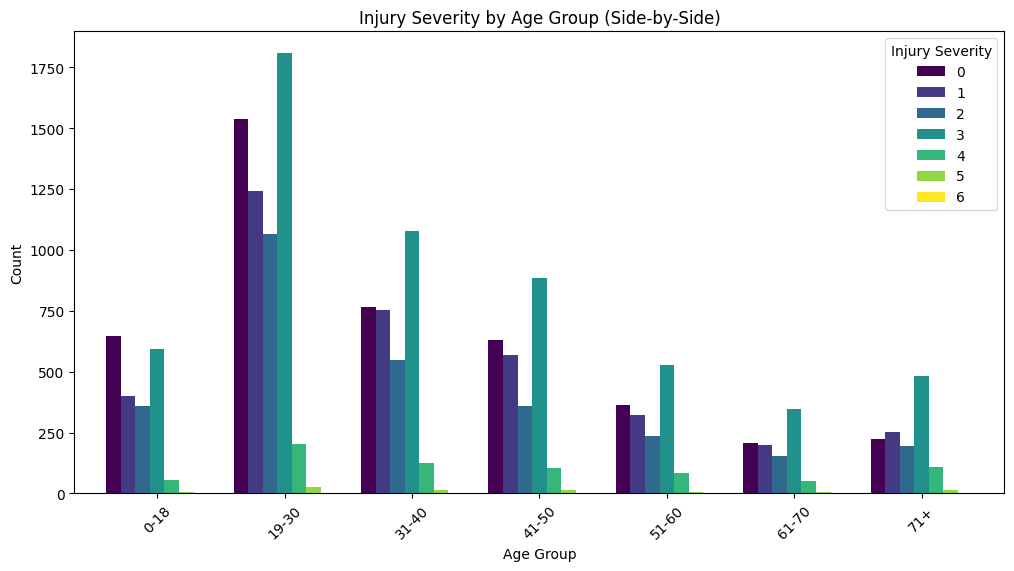

In [24]:
# Create age bins for grouping
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]
age_labels = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71+"]
train_df["age_group"] = pd.cut(train_df["occupant_age"], bins=age_bins, labels=age_labels)

# Group data by age group and injury severity
age_severity_counts = train_df.groupby(["age_group", "injury_severity"]).size().unstack()

# Plot side-by-side bar chart
plt.figure(figsize=(12, 6))
age_severity_counts.plot(kind="bar", colormap="viridis", figsize=(12, 6), width=0.8)

plt.title("Injury Severity by Age Group (Side-by-Side)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Injury Severity")
plt.xticks(rotation=45)
plt.show()

In [25]:
#Only on train set: Create new binary target: 0 = No Injury, 1 = Any Injury
train_df["injury_severity"] = train_df["injury_severity"]

# Check distribution
print(train_df["injury_severity"].value_counts(normalize=True) * 100)

injury_severity
3    32.553373
0    24.907486
1    21.292343
2    16.578423
4     4.150299
5     0.512383
6     0.005693
Name: proportion, dtype: float64


## Feautre engineering for the (target)

In [26]:
#Only on train set: Create new binary target: 0 = No Injury, 1 = Any Injury
train_df["injury_severity_target"] = train_df["injury_severity"].apply(lambda x: 0 if x == 0 else 1)

# Check distribution
print(train_df["injury_severity_target"].value_counts(normalize=True) * 100)


injury_severity_target
1    75.092514
0    24.907486
Name: proportion, dtype: float64


In [27]:
train_df = train_df.drop(columns=["injury_severity"])
#test_df = test_df.drop(columns=["injury_severity"]) NOT IN AXIS ALREADY
# Verify the remaining columns
#test_df.head()
train_df.head()

,vehicle_type,vehicle_weight,fatality,airbag_present,seatbelt_used,frontal_crash,occupant_sex,occupant_age,accident_year,vehicle_year,airbag_status,occupant_role,airbag_deployed,age_group,injury_severity_target
0,55,53,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,41-50,1
1,32,155,alive,none,none,1,m,26,2001,1968,unavail,driver,0,19-30,1
2,55,39,alive,none,none,1,f,51,2002,1994,unavail,driver,0,51-60,1
3,32,169,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,19-30,1
4,17,28,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,19-30,0


In [28]:
print(train_df.select_dtypes(include=['number']).columns)

Index(['vehicle_type', 'vehicle_weight', 'frontal_crash', 'occupant_age',
       'accident_year', 'vehicle_year', 'airbag_deployed',
       'injury_severity_target'],
      dtype='object')


In [29]:
print(test_df.select_dtypes(include=['number']).columns)

Index(['vehicle_type', 'vehicle_weight', 'frontal_crash', 'occupant_age',
       'accident_year', 'vehicle_year', 'airbag_deployed'],
      dtype='object')


## Base line Model for numerical values 

Logistic Regression

In [30]:
# Define numerical features (excluding the target)
numerical_cols = ["vehicle_type", "vehicle_weight", "frontal_crash", "occupant_age",
                  "accident_year", "vehicle_year", "airbag_deployed"]
X = train_df[numerical_cols]
y = train_df["injury_severity_target"]

In [31]:
#split into 80 percent training and 20 percent validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [32]:
#normalize numerical feuatres since logistic regression is sensitive to feautre scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [33]:
# ===== BALANCING WITH SMOTE or ADASYN =====
#from imblearn.over_sampling import SMOTE  # or ADASYN

# ---- OPTION 1: SMOTE ----
#smote = SMOTE(random_state=42)
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [34]:
# ---- OPTION 2: ADASYN ----
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_scaled, y_train = adasyn.fit_resample(X_train_scaled, y_train)

In [35]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)


In [36]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)


In [37]:
#train the logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [38]:
y_pred = model.predict(X_val_scaled)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

# Print results
print(f"Baseline Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Baseline Model Accuracy: 0.6385

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.77      0.51       875
           1       0.89      0.60      0.71      2638

    accuracy                           0.64      3513
   macro avg       0.64      0.68      0.61      3513
weighted avg       0.76      0.64      0.66      3513



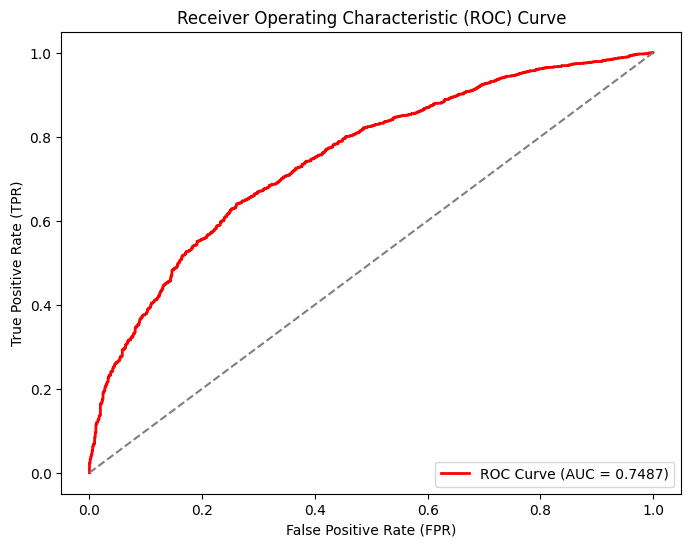

AUC Score: 0.7487


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Get predicted probabilities for the positive class (injury = 1)
y_probs = model.predict_proba(X_val_scaled)[:, 1]  # Get probability of class 1

# Compute AUC score
auc_score = roc_auc_score(y_val, y_probs)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="red", lw=2, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score: {auc_score:.4f}")

## Including Categorical Values 

In [41]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns.tolist())

Categorical Columns: ['fatality', 'airbag_present', 'seatbelt_used', 'occupant_sex', 'airbag_status', 'occupant_role']


In [42]:
print(train_df["seatbelt_used"].unique())

['belted' 'none']


Apply Label Encoding for:

fatality
,airbag_present
,occupant_sex, seatbelt used
, and occupant_role

Apply One-Hot Encoding for:

airbag_status

## SEATBELT

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Now, add 'seatbelt_used' as a categorical feature
le = LabelEncoder()
train_df["seatbelt_used"] = le.fit_transform(train_df["seatbelt_used"].astype(str))

In [45]:
# Update feature set
X = train_df[numerical_cols + ["seatbelt_used"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [46]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [47]:
# ---- OPTION 2: ADASYN ----
#from imblearn.over_sampling import ADASYN
#adasyn = ADASYN(random_state=42)
#X_train_scaled, y_train = adasyn.fit_resample(X_train_scaled, y_train)

In [48]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [49]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)


In [50]:
#Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [51]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'seatbelt_used'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'seatbelt_used'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)

## SEATBELT AND AIRBAG STATUS

In [52]:
# Now, add 'airbag_status' as the next categorical feature
#le = LabelEncoder()
#train_df["airbag_status"] = le.fit_transform(train_df["airbag_status"].astype(str))

In [53]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [54]:
# ---- OPTION 1: SMOTE ----
#smote = SMOTE(random_state=42)
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [55]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [56]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [57]:
# Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [58]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'airbag_status'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'airbag_status'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)


## SEATBELT, AIRBAGSTATUS, OCCUPANT ROLE

In [59]:
# Now, add 'occupant_role' as the next categorical feature
#le = LabelEncoder()
#train_df["occupant_role"] = le.fit_transform(train_df["occupant_role"].astype(str))

In [60]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status", "occupant_role"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [61]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [62]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [63]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [64]:
# Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [65]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'occupant_role'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'occupant_role'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)

## SEATBELT, AIRBAGSTATUS, OCCUPANT ROLE, OCCUPANT SEX

In [66]:
# Now, add 'occupant_sex' as the next categorical feature
#le = LabelEncoder()
#train_df["occupant_sex"] = le.fit_transform(train_df["occupant_sex"].astype(str))

In [67]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status", "occupant_role", "occupant_sex"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [68]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [69]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [71]:
# Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [72]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'occupant_sex'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'occupant_sex'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)

## SEATBELT, AIRBAGSTATUS, OCCUPANT ROLE, OCCUPANT SEX, AIRBAG PRESENT

In [73]:
# Now, add 'airbag_present' as the next categorical feature
#le = LabelEncoder()
#train_df["airbag_present"] = le.fit_transform(train_df["airbag_present"].astype(str))

In [74]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status", "occupant_role", "occupant_sex", "airbag_present"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)


In [75]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [76]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [77]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [78]:
# Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [79]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'airbag_present'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'airbag_present'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)

## SEATBELT, AIRBAGSTATUS, OCCUPANT ROLE, OCCUPANT SEX, AIRBAG PRESENT, FATALITY

In [80]:
# Now, add 'fatality' as the next categorical feature
#le = LabelEncoder()
#train_df["fatality"] = le.fit_transform(train_df["fatality"].astype(str))

In [81]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status", "occupant_role", "occupant_sex", "airbag_present", "fatality"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [82]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [83]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [84]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [85]:
# ---- OPTION 2: ADASYN ----
#from imblearn.over_sampling import ADASYN
#adasyn = ADASYN(random_state=42)
#X_train_scaled, y_train = adasyn.fit_resample(X_train_scaled, y_train)

In [86]:
# Retrain logistic regression model
#model.fit(X_train_scaled, y_train)

In [87]:
# Get new model performance
#y_pred = model.predict(X_val_scaled)
#updated_accuracy = accuracy_score(y_val, y_pred)
#updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
#updated_report = classification_report(y_val, y_pred)
#print(f"Updated Model Accuracy (after adding 'fatality'): {updated_accuracy:.4f}")
#print(f"Updated Model AUC (after adding 'fatality'): {updated_auc:.4f}")
#print("Updated Classification Report:\n", updated_report)

In [88]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["seatbelt_used", "airbag_status", "occupant_role", "occupant_sex", "airbag_present", "fatality"]
for col in cat_cols:
    train_df[col] = LabelEncoder().fit_transform(train_df[col].astype(str))


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Now, add 'airbag_status' using One-Hot Encoding
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
ohe_columns = onehot_encoder.fit_transform(train_df[['airbag_status']])
ohe_column_names = onehot_encoder.get_feature_names_out(['airbag_status'])

ohe_df = pd.DataFrame(ohe_columns, columns=ohe_column_names, index=train_df.index)
train_df = pd.concat([train_df, ohe_df], axis=1)
train_df.drop(columns=['airbag_status'], inplace=True)


In [89]:
# Update feature set
#X = train_df[numerical_cols + ["seatbelt_used", "airbag_status", "occupant_role", "occupant_sex", "airbag_present", "fatality"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [90]:
# ---- OPTION 1: SMOTE ----
#X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [91]:
#import xgboost as xgb

#model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#model.fit(X_train_scaled, y_train)

In [92]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)

In [93]:
# Retrain logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [94]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.6809
Updated Model AUC'): 0.7640
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.73      0.53       875
           1       0.88      0.67      0.76      2638

    accuracy                           0.68      3513
   macro avg       0.65      0.70      0.64      3513
weighted avg       0.77      0.68      0.70      3513



In [95]:
#from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7632
Updated Model AUC'): 0.7510
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.38      0.45       875
           1       0.81      0.89      0.85      2638

    accuracy                           0.76      3513
   macro avg       0.67      0.64      0.65      3513
weighted avg       0.74      0.76      0.75      3513



In [97]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:38:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [98]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7720
Updated Model AUC'): 0.7632
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.36      0.44       875
           1       0.81      0.91      0.86      2638

    accuracy                           0.77      3513
   macro avg       0.69      0.63      0.65      3513
weighted avg       0.75      0.77      0.75      3513



In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.6937
Updated Model AUC'): 0.6056
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.43      0.41       875
           1       0.80      0.78      0.79      2638

    accuracy                           0.69      3513
   macro avg       0.60      0.61      0.60      3513
weighted avg       0.70      0.69      0.70      3513



In [101]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [102]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7848
Updated Model AUC'): 0.7814
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.32      0.43       875
           1       0.81      0.94      0.87      2638

    accuracy                           0.78      3513
   macro avg       0.72      0.63      0.65      3513
weighted avg       0.76      0.78      0.76      3513



In [103]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 10552, number of negative: 3500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 14052, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.750925 -> initscore=1.103552
[LightGBM] [Info] Start training from score 1.103552


LGBMClassifier(random_state=42)

In [104]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7814
Updated Model AUC'): 0.7785
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.44       875
           1       0.81      0.93      0.86      2638

    accuracy                           0.78      3513
   macro avg       0.71      0.64      0.65      3513
weighted avg       0.76      0.78      0.76      3513



In [105]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train_scaled, y_train)

In [106]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7828
Updated Model AUC'): 0.7735
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44       875
           1       0.81      0.93      0.87      2638

    accuracy                           0.78      3513
   macro avg       0.71      0.63      0.65      3513
weighted avg       0.76      0.78      0.76      3513



In [107]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [108]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7501
Updated Model AUC'): 0.6895
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40       875
           1       0.80      0.89      0.84      2638

    accuracy                           0.75      3513
   macro avg       0.65      0.61      0.62      3513
weighted avg       0.72      0.75      0.73      3513



In [109]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [110]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7822
Updated Model AUC'): 0.7262
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.21      0.32       875
           1       0.79      0.97      0.87      2638

    accuracy                           0.78      3513
   macro avg       0.75      0.59      0.60      3513
weighted avg       0.77      0.78      0.73      3513



In [111]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=300, random_state=42)
model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [112]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7831
Updated Model AUC'): 0.7735
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44       875
           1       0.81      0.93      0.87      2638

    accuracy                           0.78      3513
   macro avg       0.71      0.64      0.65      3513
weighted avg       0.76      0.78      0.76      3513



In [113]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [114]:
# Get new model performance
y_pred = model.predict(X_val_scaled)
updated_accuracy = accuracy_score(y_val, y_pred)
updated_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
updated_report = classification_report(y_val, y_pred)
print(f"Updated Model Accuracy: {updated_accuracy:.4f}")
print(f"Updated Model AUC'): {updated_auc:.4f}")
print("Updated Classification Report:\n", updated_report)

Updated Model Accuracy: 0.7663
Updated Model AUC'): 0.7500
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.14      0.23       875
           1       0.77      0.97      0.86      2638

    accuracy                           0.77      3513
   macro avg       0.71      0.56      0.55      3513
weighted avg       0.74      0.77      0.71      3513



## Threshold Tuning

In [115]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

def evaluate_thresholds(model, X_val_scaled, y_val, thresholds=[0.2, 0.3, 0.4, 0.5]):
    y_proba = model.predict_proba(X_val_scaled)[:, 1]
    print(f"{'Threshold':<10}{'Accuracy':<10}{'Precision (1)':<15}{'Recall (1)':<12}{'AUC':<10}")
    print("-" * 60)
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        report = classification_report(y_val, y_pred, output_dict=True)
        accuracy = accuracy_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_proba)
        precision_1 = report['1']['precision']
        recall_1 = report['1']['recall']
        print(f"{threshold:<10.2f}{accuracy:<10.3f}{precision_1:<15.3f}{recall_1:<12.3f}{auc:<10.3f}")


In [116]:
# Retrain logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [117]:
evaluate_thresholds(model, X_val_scaled, y_val)

Threshold Accuracy  Precision (1)  Recall (1)  AUC       
------------------------------------------------------------
0.20      0.768     0.774          0.977       0.764     
0.30      0.770     0.806          0.913       0.764     
0.40      0.743     0.850          0.799       0.764     
0.50      0.681     0.880          0.666       0.764     


In [118]:
from sklearn.metrics import classification_report

y_prob = model.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_prob >= 0.3).astype(int)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.34      0.42       875
           1       0.81      0.91      0.86      2638

    accuracy                           0.77      3513
   macro avg       0.68      0.63      0.64      3513
weighted avg       0.75      0.77      0.75      3513



In [119]:
y_proba = model.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_proba >= 0.4).astype(int)  # changed from 0.3 to 0.4
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.58      0.53       875
           1       0.85      0.80      0.82      2638

    accuracy                           0.74      3513
   macro avg       0.67      0.69      0.68      3513
weighted avg       0.76      0.74      0.75      3513



In [120]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Calculate class weight
scale_ratio = (y_train == 0).sum() / (y_train == 1).sum()

scale_ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=scale_ratio * 0.7, random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict with threshold 0.4
y_proba_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

# Show classification report
print(classification_report(y_val, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.42      0.73      0.53       875
           1       0.88      0.66      0.75      2638

    accuracy                           0.68      3513
   macro avg       0.65      0.69      0.64      3513
weighted avg       0.76      0.68      0.70      3513



/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:39:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 2. Get probability predictions
y_probs = model.predict_proba(X_val_scaled)[:, 1]

# 3. Apply custom threshold
threshold = 0.7 # Try different values
y_pred_custom = (y_probs >= threshold).astype(int)

# 4. Evaluate performance
print("Classification Report:")
print(classification_report(y_val, y_pred_custom))
print("AUC Score:", roc_auc_score(y_val, y_probs))


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.62      0.53       875
           1       0.86      0.76      0.80      2638

    accuracy                           0.72      3513
   macro avg       0.66      0.69      0.67      3513
weighted avg       0.76      0.72      0.74      3513

AUC Score: 0.7510466803855734


In [142]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define individual models
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Combine them in a soft voting classifier (uses predicted probabilities)
ensemble = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Train
ensemble.fit(X_train_scaled, y_train)

# Predict
y_probs = ensemble.predict_proba(X_val_scaled)[:, 1]
threshold = 0.7
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_val, y_pred_thresh))
print("AUC Score:", roc_auc_score(y_val, y_probs))


              precision    recall  f1-score   support

           0       0.47      0.64      0.54       875
           1       0.87      0.76      0.81      2638

    accuracy                           0.73      3513
   macro avg       0.67      0.70      0.68      3513
weighted avg       0.77      0.73      0.74      3513

AUC Score: 0.7749660998592007


/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:45:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [144]:
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[('rf', rf_clf), ('xgb', xgb_clf)],
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train_scaled, y_train)

y_probs_stack = stack_model.predict_proba(X_val_scaled)[:, 1]
y_pred_stack = (y_probs_stack >= 0.6).astype(int)

print(classification_report(y_val, y_pred_stack))
print("AUC Score:", roc_auc_score(y_val, y_probs_stack))

/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:48:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:48:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.54      0.43      0.48       875
           1       0.82      0.88      0.85      2638

    accuracy                           0.77      3513
   macro avg       0.68      0.65      0.66      3513
weighted avg       0.75      0.77      0.76      3513

AUC Score: 0.7648887685476009
